# Waterloo Population Forecasting 

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Read / Clean the data

In [4]:
data = pd.read_csv('Waterloo_Population.csv')
data.columns = data.columns.str.strip()

data['date'] = pd.to_datetime(data['date'])
reference_date = datetime(1950, 1, 1)
data['Days_since_reference'] = (data['date'] - reference_date).dt.days

data.head(5)

,date,Population,Annual Change,Days_since_reference
0,1950-12-31,54000,0.00,364
1,1951-12-31,60000,11.11,729
2,1952-12-31,66000,10.00,1095
3,1953-12-31,72000,9.09,1460
4,1954-12-31,80000,11.11,1825


## Plot the Data to find Trend

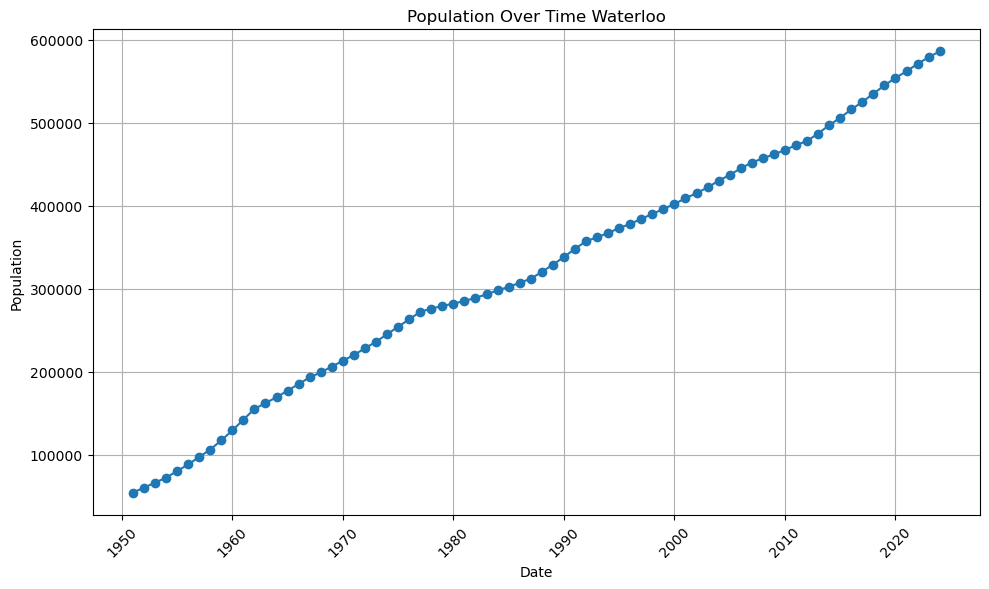

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['Population'], marker='o', linestyle='-')
plt.title('Population Over Time Waterloo')
plt.xlabel('Date')
plt.ylabel('Population')
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

## Split the data into Train and Test 

In [6]:
from sklearn.model_selection import train_test_split

X = data[['Days_since_reference']]
y = data['Population']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 56)


## Fit and Train the Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

predictions_train = lm.predict(X_train)
predictions_test = lm.predict(X_test)

## Cofficient and Intercept of Model

In [8]:
print(lm.intercept_)
print(lm.coef_)

67185.45547578458
[18.75023379]


## Plotting Linear Regression Model and Population Graph

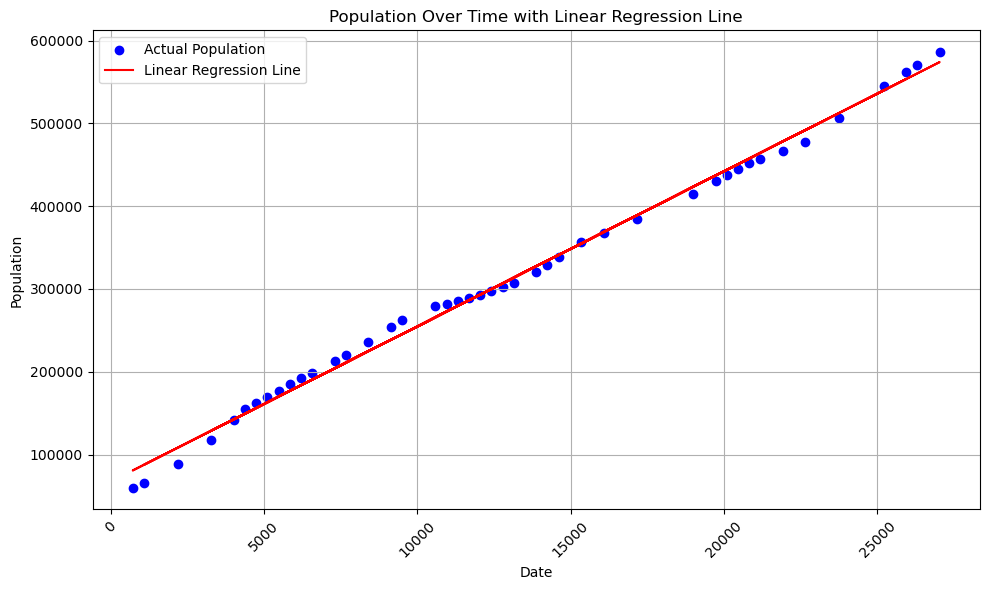

In [9]:

# Plot the data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual Population')
plt.plot(X_train, predictions_train, color='red', label='Linear Regression Line')
plt.title('Population Over Time with Linear Regression Line')
plt.xlabel('Date')
plt.ylabel('Population')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
from sklearn import metrics
mape_test = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

print("MAE:", metrics.mean_absolute_error(y_test, predictions_test))
print("MSE:", metrics.mean_squared_error(y_test, predictions_test))

print("MAPE for testing set:", mape_test) # 2.73% deviate from the actual dataset

MAE: 9740.81382842422
MSE: 134864314.1977731
MAPE for testing set: 6.278929299392623


## Predictions for the years

In [11]:

start_date = datetime(2024, 3, 29)
end_date = datetime(2026, 1, 1)

predicted_populations = []

current_date = start_date
while current_date <= end_date:
    days_since_reference = (current_date - reference_date).days
    current_date_numeric = np.array([[days_since_reference]])
    
    predicted_population = lm.predict(current_date_numeric)
    
    predicted_populations.append(predicted_population[0])
    
    current_date += timedelta(days=1)


## Predicted Populations VS Date dataframe

In [12]:
actual_dates = [start_date + timedelta(days=i) for i in range(len(predicted_populations))]

df_predicted_population = pd.DataFrame({
    'Date': actual_dates,
    'Predicted Population': predicted_populations
})

df_predicted_population.head()

,Date,Predicted Population
0,2024-03-29,575616.794798
1,2024-03-30,575635.545032
2,2024-03-31,575654.295266
3,2024-04-01,575673.045500
4,2024-04-02,575691.795733


## Extract Specific Date Population

In [13]:
desired_date = datetime(2024, 4, 1)

predicted_population = df_predicted_population.loc[df_predicted_population['Date'] == desired_date, 'Predicted Population'].values[0]

print("Predicted Population for", desired_date, ":", predicted_population)

Predicted Population for 2024-04-01 00:00:00 : 575673.0454995754
